<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DATA" data-toc-modified-id="DATA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Target</a></span></li></ul></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Model evaluation</a></span></li></ul></li><li><span><a href="#Baseline" data-toc-modified-id="Baseline-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Baseline</a></span><ul class="toc-item"><li><span><a href="#Pipeline" data-toc-modified-id="Pipeline-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pipeline</a></span></li><li><span><a href="#Classifier" data-toc-modified-id="Classifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Classifier</a></span></li></ul></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature importance</a></span><ul class="toc-item"><li><span><a href="#Default-SKLEARN" data-toc-modified-id="Default-SKLEARN-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Default SKLEARN</a></span></li><li><span><a href="#Permutation-Feature-Importance" data-toc-modified-id="Permutation-Feature-Importance-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Permutation Feature Importance</a></span><ul class="toc-item"><li><span><a href="#Tests" data-toc-modified-id="Tests-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Tests</a></span></li><li><span><a href="#Try" data-toc-modified-id="Try-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Try</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.feature_selection import SelectFromModel
from scipy import stats
import statsmodels.api as sm
import os
from IPython.display import Image
import pydotplus
from sklearn import tree
import pickle
import eli5
from eli5.sklearn import PermutationImportance

## DATA

### Dataset

In [2]:
data_root="../data/"
datafile=os.path.join(data_root,'no_carrito_no_pedido_df_2019_2020_jan21.csv')
df=pd.read_csv(datafile, nrows=100000)
print(df.shape)
df.head(3)

(100000, 22)


/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,ga:productSKU,ga:dateHourMinute,ga:pagePath,ga:pageDepth,ga:userType,ga:sessionCount,ga:daysSinceLastSession,ga:landingPagePath,ga:campaign,...,ga:deviceCategory,ga:operatingSystem,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart,ga:productAddsToCart_transf,pPath_clean,Web_Discount,Product_price
0,0,1008,201904301452,/parafarmacia/es/,1,New Visitor,1,0,/parafarmacia/es/,(not set),...,mobile,iOS,1,0,0,0,0,/parafarmacia/es/,0.0,3.47
1,1,1008,201904301524,/parafarmacia/es/,3,New Visitor,1,0,/parafarmacia/es/,(not set),...,desktop,Windows,1,0,0,0,0,/parafarmacia/es/,0.0,3.47
2,2,1008,201904301545,/parafarmacia/es/,7,Returning Visitor,33,0,/parafarmacia/es/,(not set),...,desktop,Windows,1,0,0,0,0,/parafarmacia/es/,0.0,3.47


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.shape)
print("")
df.info()

(100000, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ga:productSKU                100000 non-null  object 
 1   ga:dateHourMinute            100000 non-null  int64  
 2   ga:pagePath                  100000 non-null  object 
 3   ga:pageDepth                 100000 non-null  int64  
 4   ga:userType                  100000 non-null  object 
 5   ga:sessionCount              100000 non-null  int64  
 6   ga:daysSinceLastSession      100000 non-null  int64  
 7   ga:landingPagePath           100000 non-null  object 
 8   ga:campaign                  100000 non-null  object 
 9   ga:sourceMedium              100000 non-null  object 
 10  ga:city                      100000 non-null  object 
 11  ga:deviceCategory            100000 non-null  object 
 12  ga:operatingSystem           100000 non-null 

In [4]:
# Product SKU as string
df['ga:productSKU']=df['ga:productSKU'].astype('str')

# dateHourMinute as SIN and COS
df['ga:dateHourMinute']=pd.to_datetime(df['ga:dateHourMinute'],format='%Y%m%d%H%M')
df['dateTime_month']=df['ga:dateHourMinute'].dt.month
df['dateTime_dayofweek']=df['ga:dateHourMinute'].dt.dayofweek
df['dateTime_hour']=df['ga:dateHourMinute'].dt.hour
df['month_sin']=np.sin((df.dateTime_month-1)*(2.*np.pi/12)) # I substract minus 1 to 'df.dateTime_month' because its values are coded as 1 to 12 instead of 0 to 11
df['month_cos']=np.cos((df.dateTime_month-1)*(2.*np.pi/12)) # I substract minus 1 to 'df.dateTime_month' because its values are coded as 1 to 12 instead of 0 to 11
df['dayofweek_sin']=np.sin(df.dateTime_dayofweek*(2.*np.pi/7))
df['dayofweek_cos']=np.cos(df.dateTime_dayofweek*(2.*np.pi/7))
df['hour_sin']=np.sin(df.dateTime_hour*(2.*np.pi/24))
df['hour_cos']=np.cos(df.dateTime_hour*(2.*np.pi/24))
df.drop(['dateTime_month','dateTime_dayofweek','dateTime_hour'],axis=1, inplace=True)

# Source Medium as 2 columns:
source_medium = df['ga:sourceMedium'].str.split('/',expand=True)
source_medium.columns=['Source','Medium']
df= df.merge(source_medium,left_index=True,right_index=True,how='left')
del(source_medium)
df['Source']=df['Source'].astype('str').str.strip()
df['Medium']=df['Medium'].astype('str').str.strip()

# City
df['ga:city']=df['ga:city'].astype('str')

# Device
df['ga:deviceCategory']=df['ga:deviceCategory'].astype('str')

# Operating System
df['ga:operatingSystem']=df['ga:operatingSystem'].astype('str')

# User Type
df['Returning_Visitor']= np.where(df['ga:userType']=='Returning Visitor',1,0)

# Page Path, Detail_View and Landing Page Path as string
df['ga:pagePath']=df['ga:pagePath'].astype('str')
df['ga:pagePath'] = df['ga:pagePath'].apply(lambda x: x[:x.find("?pag")] if "?pag" in x else x)
df['Detail_View']=df['ga:pagePath'].apply(lambda url: 1 if url[-5:]=='.html' else 0)
df['ga:landingPagePath']=df['ga:landingPagePath'].astype('str')
df['ga:landingPagePath'] = df['ga:landingPagePath'].apply(lambda x: x[:x.find("?pag")] if "?pag" in x else x)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ga:productSKU                100000 non-null  object        
 1   ga:dateHourMinute            100000 non-null  datetime64[ns]
 2   ga:pagePath                  100000 non-null  object        
 3   ga:pageDepth                 100000 non-null  int64         
 4   ga:userType                  100000 non-null  object        
 5   ga:sessionCount              100000 non-null  int64         
 6   ga:daysSinceLastSession      100000 non-null  int64         
 7   ga:landingPagePath           100000 non-null  object        
 8   ga:campaign                  100000 non-null  object        
 9   ga:sourceMedium              100000 non-null  object        
 10  ga:city                      100000 non-null  object        
 11  ga:deviceCategory          

### Target

In [5]:
df['ga:productAddsToCart_transf']=df["ga:productAddsToCart"].apply(lambda x: 1 if x>1 else x)

print("No. observations per class")
print(df['ga:productAddsToCart_transf'].value_counts())
print("")

print("% observations per class")
print(100*df['ga:productAddsToCart_transf'].value_counts(normalize=True))

No. observations per class
0    95520
1     4480
Name: ga:productAddsToCart_transf, dtype: int64

% observations per class
0    95.52
1     4.48
Name: ga:productAddsToCart_transf, dtype: float64


## Functions

### Model evaluation

In [6]:
def evaluate(classifier,X_train, X_test, y_train, y_test):
    classifier.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    probabilities = classifier.predict_proba(X_test)
    print("TRAINING SCORE: " + str(classifier.score(X_train,y_train)))
    print("ACCURACY: " + str(accuracy_score(y_test, predictions)))
    print("PRECISION: " + str(precision_score(y_test, predictions)))
    print("RECALL: " + str(recall_score(y_test, predictions)))
    print("F1 SCORE: " + str(f1_score(y_test, predictions)))
    print("AUC: " + str(roc_auc_score(y_test,probabilities[:, 1])))

    tpr, fpr, thresolds = roc_curve(y_test, probabilities[:, 1])
    plt.plot(tpr, fpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')

## Baseline

### Pipeline

In [8]:
# 'Operating System' Transformer

important_os = ['Android','iOS','Windows','Macintosh']

class OSTransfomer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        X_=X.copy()
        X_['ga:operatingSystem']=X_['ga:operatingSystem'].apply(lambda os: 'other OS' if os not in important_os else os)
        return X_
    
    
# Compile 'Source'

def source_compiler(x):
    
    insta_words= ['instagram','ig','linktr.ee']
    for seq in insta_words:
        if seq in x.lower():
            return 'instagram'
    if 'facebook' in x.lower():
        return 'facebook'
    if 'youtube' in x.lower():
        return 'youtube'  
    if 'vogue' in x.lower():
        return 'vogue'
    if 'yahoo' in x.lower():
        return 'yahoo'
    else:
        return x

important_sources = ['google','(direct)','instagram','facebook','sendinblue','youtube','bing','yahoo','vogue','cantabrialabs.es']

class SourceTransfomer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        X_=X.copy()
        X_['Source']=X_['Source'].apply(source_compiler)
        X_['Source']=X_['Source'].apply(lambda source: 'other sources' if source not in important_sources else source)
        return X_
    
# Compile 'Medium':

def medium_compiler(x):
    
    if 'cpc' in x.lower():
        return 'cpc'
    if x=='Social':
        return 'IGShopping'  
    if x=='facebook':
        return 'facebook ads'
    if x=='trafico':
        return 'facebook trafico'
    else:
        return x
    
class MediumTransfomer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        X_=X.copy()
        X_['Medium']=X_['Medium'].apply(medium_compiler)
        return X_
    
# Select other columns with no transformations (in order to be able to apply get_feature_names)

class SelectColumnTransformer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        return X

In [9]:
# Pipeline:

source_preprocessing = Pipeline([
    ('source_transf',SourceTransfomer()),
    ('ohe',OneHotEncoder()) # handle_unknown is default 'error'
])

medium_preprocessing = Pipeline([
    ('medium_transf',MediumTransfomer()),
    ('ohe',OneHotEncoder(drop='first')) #to drop (none) that is equal to (direct) in Source
]) # handle_unknown is default 'error'

device_preprocessing = Pipeline([
    ('ohe',OneHotEncoder()) # handle_unknown is default 'error'
])

os_preprocessing = Pipeline([
    ('os_transf',OSTransfomer()),
    ('ohe',OneHotEncoder()) # handle_unknown is default 'error'
])

targetencod_preprocessing = Pipeline([('target_encoding',TargetEncoder())])

imput_preprocessing = Pipeline([('impute_median',SimpleImputer(strategy='median'))])

no_preprocessing = Pipeline([('select_columns',SelectColumnTransformer())])

preprocess = ColumnTransformer([
    ('source_preprocessing',source_preprocessing,['Source']),
    ('medium_preprocessing',medium_preprocessing,['Medium']),
    ('device_preprocessing',device_preprocessing,['ga:deviceCategory']),
    ('os_preprocessing',os_preprocessing,['ga:operatingSystem']),
    ('targetencod_preprocessing',targetencod_preprocessing,['ga:productSKU','ga:city','ga:pagePath','ga:landingPagePath']),
    ('imput_preprocessing',imput_preprocessing,['Product_price']),
    ('no_preprocessing',no_preprocessing,['Web_Discount','Detail_View','ga:pageDepth','Returning_Visitor','ga:sessionCount','ga:daysSinceLastSession','month_sin','month_cos','dayofweek_sin','dayofweek_cos','hour_sin','hour_cos'])
])

pipeline=Pipeline([
    ('preprocess',preprocess),
    ('clrf',RandomForestClassifier(n_estimators=100,n_jobs=-1, oob_score=True,bootstrap=True,random_state=42))
])

### Classifier

In [10]:
# Data

features=['ga:pageDepth','ga:sessionCount','ga:daysSinceLastSession','ga:productSKU',\
          'month_sin','month_cos','dayofweek_sin','dayofweek_cos','hour_sin','hour_cos',\
          'Source','Medium','ga:city','ga:deviceCategory','ga:operatingSystem','Returning_Visitor',\
          'Product_price','Web_Discount','ga:pagePath','Detail_View','ga:landingPagePath']

y=df['ga:productAddsToCart_transf']
X=df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TRAINING SCORE: 0.9999866666666667
ACCURACY: 0.99408
PRECISION: 0.9902152641878669
RECALL: 0.88
F1 SCORE: 0.9318600368324125
AUC: 0.998199598942667


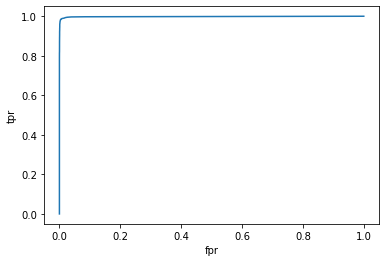

In [11]:
evaluate(pipeline,X_train, X_test, y_train, y_test)

In [12]:
print(classification_report(y_test,pipeline.predict(X_test)))
clrf_cm = confusion_matrix(y_test,pipeline.predict(X_test))
clrf_cm

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23850
           1       0.99      0.88      0.93      1150

    accuracy                           0.99     25000
   macro avg       0.99      0.94      0.96     25000
weighted avg       0.99      0.99      0.99     25000



array([[23840,    10],
       [  138,  1012]])

## Feature importance

### Default SKLEARN

In [13]:
importances = pipeline.steps[1][1].feature_importances_
importances

array([2.08537443e-03, 3.28213141e-04, 1.66033320e-03, 3.93861822e-03,
       1.61247714e-03, 2.00716908e-04, 5.34874668e-04, 1.12003516e-04,
       0.00000000e+00, 5.63726465e-04, 6.30818249e-03, 3.69326478e-03,
       2.61945749e-03, 1.98137753e-03, 2.85590288e-03, 2.11854717e-03,
       3.23968379e-03, 9.92257159e-04, 1.91256766e-03, 3.23251942e-03,
       1.35894680e-04, 1.72632581e-01, 3.45577971e-02, 3.69500608e-01,
       3.60546626e-02, 3.69785415e-02, 3.34419064e-03, 1.65456442e-01,
       4.08241211e-02, 4.39264793e-03, 1.08057374e-02, 6.10771983e-03,
       1.23151165e-02, 1.26483844e-02, 1.17226884e-02, 9.33422398e-03,
       1.72837536e-02, 1.59147905e-02])

In [14]:
pipeline.named_steps['preprocess']

ColumnTransformer(transformers=[('source_preprocessing',
                                 Pipeline(steps=[('source_transf',
                                                  SourceTransfomer()),
                                                 ('ohe', OneHotEncoder())]),
                                 ['Source']),
                                ('medium_preprocessing',
                                 Pipeline(steps=[('medium_transf',
                                                  MediumTransfomer()),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Medium']),
                                ('device_preprocessing',
                                 Pipeline(steps=[('ohe', OneHotEncoder())]),
                                 ['ga:devic...
                                 Pipeline(steps=[('impute_median',
                                                  Simp

In [15]:
pipeline.named_steps['preprocess'].transformers_[0][1].named_steps['ohe'].get_feature_names()

array(['x0_(direct)', 'x0_bing', 'x0_cantabrialabs.es', 'x0_facebook',
       'x0_google', 'x0_instagram', 'x0_other sources', 'x0_sendinblue',
       'x0_vogue', 'x0_yahoo', 'x0_youtube'], dtype=object)

In [16]:
pipeline.named_steps['preprocess'].transformers_[1][1].named_steps['ohe'].get_feature_names()

array(['x0_IGShopping', 'x0_cpc', 'x0_email', 'x0_facebook ads',
       'x0_facebook feed', 'x0_facebook trafico', 'x0_organic',
       'x0_referral'], dtype=object)

In [17]:
pipeline.named_steps['preprocess'].transformers_[2][1].named_steps['ohe'].get_feature_names()

array(['x0_desktop', 'x0_mobile', 'x0_tablet'], dtype=object)

In [18]:
pipeline.named_steps['preprocess'].transformers_[3][1].named_steps['ohe'].get_feature_names()

array(['x0_Android', 'x0_Macintosh', 'x0_Windows', 'x0_iOS',
       'x0_other OS'], dtype=object)

In [19]:
pipeline.named_steps['preprocess'].transformers_[4][1].named_steps['target_encoding'].get_feature_names()

['ga:productSKU', 'ga:city', 'ga:pagePath', 'ga:landingPagePath']

In [20]:
pipeline.named_steps['preprocess'].transformers_[5][1].named_steps['impute_median'].get_feature_names()

AttributeError: 'SimpleImputer' object has no attribute 'get_feature_names'

In [21]:
pipeline.named_steps['preprocess'].transformers_[6][1].named_steps['select_columns'].get_feature_names()

AttributeError: 'SelectColumnTransformer' object has no attribute 'get_feature_names'

In [22]:
pipeline['preprocess'].transformers_[5][2]

['Product_price']

According to ColumnTransformer documentation in Sklearn, 'the order of the columns in the transformed feature matrix follows the order of how the columns are specified in the transformers list'. 

In [15]:
features_names=[]

for feature in range(0,4):
    features= list(pipeline.named_steps['preprocess'].transformers_[feature][1].named_steps['ohe'].get_feature_names())
    features_names.append(features)

for feature in range(4,7):
    features = pipeline['preprocess'].transformers_[feature][2]
    features_names.append(features)

features_names = [j for i in features_names for j in i]
print(len(features_names))
features_names

38


['x0_(direct)',
 'x0_bing',
 'x0_facebook',
 'x0_google',
 'x0_instagram',
 'x0_other sources',
 'x0_vogue',
 'x0_yahoo',
 'x0_youtube',
 'x0_IGShopping',
 'x0_cpc',
 'x0_organic',
 'x0_referral',
 'x0_desktop',
 'x0_mobile',
 'x0_tablet',
 'x0_Android',
 'x0_Macintosh',
 'x0_Windows',
 'x0_iOS',
 'x0_other OS',
 'ga:productSKU',
 'ga:city',
 'ga:pagePath',
 'ga:landingPagePath',
 'Product_price',
 'Web_Discount',
 'Detail_View',
 'ga:pageDepth',
 'Returning_Visitor',
 'ga:sessionCount',
 'ga:daysSinceLastSession',
 'month_sin',
 'month_cos',
 'dayofweek_sin',
 'dayofweek_cos',
 'hour_sin',
 'hour_cos']

In [16]:
df_feat_import = pd.DataFrame({'features': features_names, 'importances': importances}).sort_values(by='importances')
df_feat_import.sort_values(by='importances', ascending=False)

,features,importances
23,ga:pagePath,0.369501
21,ga:productSKU,0.172633
27,Detail_View,0.165456
28,ga:pageDepth,0.040824
25,Product_price,0.036979
24,ga:landingPagePath,0.036055
22,ga:city,0.034558
36,hour_sin,0.017284
37,hour_cos,0.015915
33,month_cos,0.012648


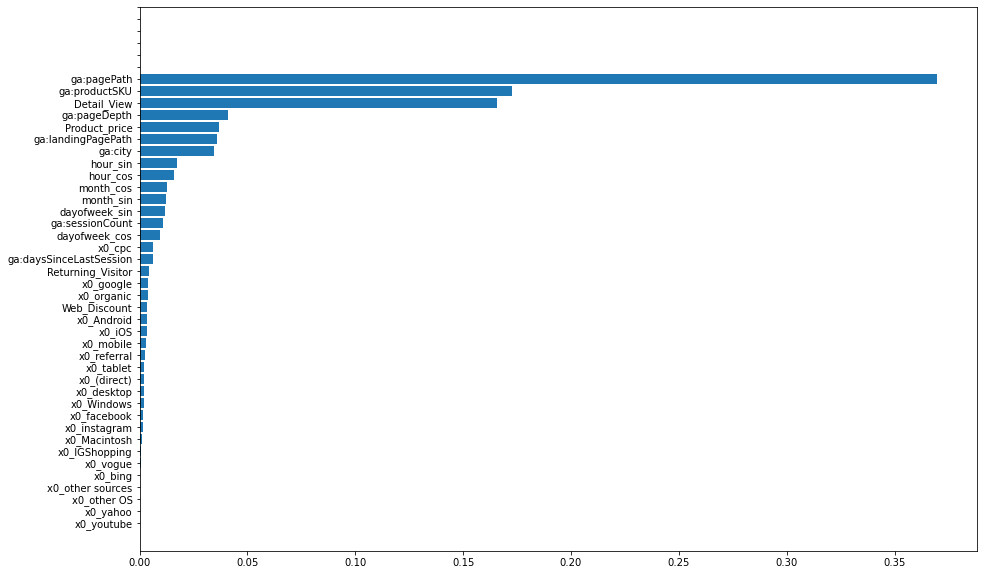

In [17]:
plt.figure(figsize=(15,10))
plt.barh(df_feat_import['features'],df_feat_import['importances'] )
plt.yticks(range(44));

Como vemos, el método predeterminado feature_importance favorece las variables continuas y las variables categoricas con alta cardinal (pagePath, productSKU, productPrice... Este es uno de sus principales inconvenientes, a pesar de la rapidez y facilidad con la que podemos obtener sus resultados. 

### Permutation Feature Importance

#### Tests

In [6]:
# Data

features=['ga:pageDepth','ga:sessionCount','ga:daysSinceLastSession','ga:productSKU',\
          'month_sin','month_cos','dayofweek_sin','dayofweek_cos','hour_sin','hour_cos',\
          'Source','Medium','ga:city','ga:deviceCategory','ga:operatingSystem','Returning_Visitor',\
          'Product_price','Web_Discount','ga:pagePath','Detail_View','ga:landingPagePath']

y=df['ga:productAddsToCart_transf']
X=df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)


In [16]:
# 'Operating System' Transformer

important_os = ['Android','iOS','Windows','Macintosh']

class OSTransfomer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        X_=X.copy()
        X_['ga:operatingSystem']=X_['ga:operatingSystem'].apply(lambda os: 'other OS' if os not in important_os else os)
        return X_
    
    
# Compile 'Source'

def source_compiler(x):
    
    insta_words= ['instagram','ig','linktr.ee']
    for seq in insta_words:
        if seq in x.lower():
            return 'instagram'
    if 'facebook' in x.lower():
        return 'facebook'
    if 'youtube' in x.lower():
        return 'youtube'  
    if 'vogue' in x.lower():
        return 'vogue'
    if 'yahoo' in x.lower():
        return 'yahoo'
    else:
        return x

important_sources = ['google','(direct)','instagram','facebook','sendinblue','youtube','bing','yahoo','vogue','cantabrialabs.es']

class SourceTransfomer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        X_=X.copy()
        X_['Source']=X_['Source'].apply(source_compiler)
        X_['Source']=X_['Source'].apply(lambda source: 'other sources' if source not in important_sources else source)
        return X_
    
# Compile 'Medium':

def medium_compiler(x):
    
    if 'cpc' in x.lower():
        return 'cpc'
    if x=='Social':
        return 'IGShopping'  
    if x=='facebook':
        return 'facebook ads'
    if x=='trafico':
        return 'facebook trafico'
    else:
        return x
    
class MediumTransfomer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        X_=X.copy()
        X_['Medium']=X_['Medium'].apply(medium_compiler)
        return X_
    
# Select other columns with no transformations (in order to be able to apply get_feature_names)

class SelectColumnTransformer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        return X

In [18]:
# PIPELINE:

# Preprocess:
source_preprocessing = Pipeline([
    ('source_transf',SourceTransfomer()),
    ('ohe',OneHotEncoder()) # handle_unknown is default 'error'
])

medium_preprocessing = Pipeline([
    ('medium_transf',MediumTransfomer()),
    ('ohe',OneHotEncoder(drop='first')) #to drop (none) that is equal to (direct) in Source
]) # handle_unknown is default 'error'

device_preprocessing = Pipeline([
    ('ohe',OneHotEncoder()) # handle_unknown is default 'error'
])

os_preprocessing = Pipeline([
    ('os_transf',OSTransfomer()),
    ('ohe',OneHotEncoder()) # handle_unknown is default 'error'
])

targetencod_preprocessing = Pipeline([('target_encoding',TargetEncoder())])

imput_preprocessing = Pipeline([('impute_median',SimpleImputer(strategy='median'))])

no_preprocessing = Pipeline([('select_columns',SelectColumnTransformer())])

preprocess = ColumnTransformer([
    ('source_preprocessing',source_preprocessing,['Source']),
    ('medium_preprocessing',medium_preprocessing,['Medium']),
    ('device_preprocessing',device_preprocessing,['ga:deviceCategory']),
    ('os_preprocessing',os_preprocessing,['ga:operatingSystem']),
    ('targetencod_preprocessing',targetencod_preprocessing,['ga:productSKU','ga:city','ga:pagePath','ga:landingPagePath']),
    ('imput_preprocessing',imput_preprocessing,['Product_price']),
    ('no_preprocessing',no_preprocessing,['Web_Discount','Detail_View','ga:pageDepth','Returning_Visitor','ga:sessionCount','ga:daysSinceLastSession','month_sin','month_cos','dayofweek_sin','dayofweek_cos','hour_sin','hour_cos'])
])

# Feature Selection:
rf_feat_imp = RandomForestClassifier()
rf_permutation_imp = PermutationImportance(rf_feat_imp,cv=5)
feature_selection = SelectFromModel(rf_permutation_imp, threshold=0.005)

# Model
pipeline=Pipeline([
    ('preprocess',preprocess),
])

In [19]:
X_train_transf = pipeline.fit_transform(X_train,y_train)
X_test_transf = pipeline.transform(X_test)

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [30]:
clf = RandomForestClassifier()
clf.fit(X_train_transf,y_train)

In [32]:
per = PermutationImportance(clf).fit(X_test_transf, y_test)
eli5.show_weights(per, feature_names=features_names)

Weight,Feature
0.0556 ± 0.0020,ga:productSKU
0.0460 ± 0.0017,ga:pagePath
0.0243 ± 0.0009,Detail_View
0.0040 ± 0.0002,ga:pageDepth
0.0014 ± 0.0002,ga:city
0.0008 ± 0.0004,ga:landingPagePath
0.0003 ± 0.0001,hour_sin
0.0003 ± 0.0002,x0_cpc
0.0002 ± 0.0001,ga:sessionCount
0.0002 ± 0.0001,hour_cos


In [41]:
perm = PermutationImportance(RandomForestClassifier(), cv=5)
perm.fit(X_train_transf, y_train.to_numpy())
sel = SelectFromModel(perm, threshold=0.05, prefit=True)

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [42]:
X_train_final = sel.transform(X_train_transf)
X_test_final = sel.transform(X_test_transf)

In [45]:
clf = RandomForestClassifier()

In [46]:
clf.fit(X_train_final,y_train)

RandomForestClassifier()

In [48]:
predictions = clf.predict(X_test_final)
probabilities = clf.predict_proba(X_test_final)

TRAINING SCORE: 0.95584
ACCURACY: 0.9528
PRECISION: 0.058823529411764705
RECALL: 0.0017391304347826088
F1 SCORE: 0.0033783783783783786
AUC: 0.7025920700027345


Text(0, 0.5, 'tpr')

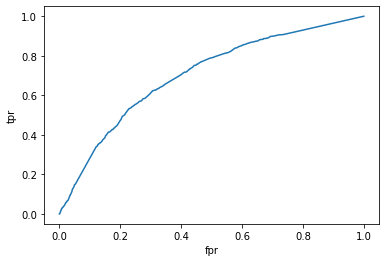

In [60]:
print("TRAINING SCORE: " + str(clf.score(X_train_final,y_train)))
print("ACCURACY: " + str(accuracy_score(y_test, predictions)))
print("PRECISION: " + str(precision_score(y_test, predictions)))
print("RECALL: " + str(recall_score(y_test, predictions)))
print("F1 SCORE: " + str(f1_score(y_test, predictions)))
print("AUC: " + str(roc_auc_score(y_test,probabilities[:, 1])))

tpr, fpr, thresolds = roc_curve(y_test, probabilities[:, 1])
plt.plot(tpr, fpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

#### Try

In [62]:
# 'Operating System' Transformer

important_os = ['Android','iOS','Windows','Macintosh']

class OSTransfomer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        X_=X.copy()
        X_['ga:operatingSystem']=X_['ga:operatingSystem'].apply(lambda os: 'other OS' if os not in important_os else os)
        return X_
    
    
# Compile 'Source'

def source_compiler(x):
    
    insta_words= ['instagram','ig','linktr.ee']
    for seq in insta_words:
        if seq in x.lower():
            return 'instagram'
    if 'facebook' in x.lower():
        return 'facebook'
    if 'youtube' in x.lower():
        return 'youtube'  
    if 'vogue' in x.lower():
        return 'vogue'
    if 'yahoo' in x.lower():
        return 'yahoo'
    else:
        return x

important_sources = ['google','(direct)','instagram','facebook','sendinblue','youtube','bing','yahoo','vogue','cantabrialabs.es']

class SourceTransfomer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        X_=X.copy()
        X_['Source']=X_['Source'].apply(source_compiler)
        X_['Source']=X_['Source'].apply(lambda source: 'other sources' if source not in important_sources else source)
        return X_
    
# Compile 'Medium':

def medium_compiler(x):
    
    if 'cpc' in x.lower():
        return 'cpc'
    if x=='Social':
        return 'IGShopping'  
    if x=='facebook':
        return 'facebook ads'
    if x=='trafico':
        return 'facebook trafico'
    else:
        return x
    
class MediumTransfomer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        X_=X.copy()
        X_['Medium']=X_['Medium'].apply(medium_compiler)
        return X_
    
# Select other columns with no transformations (in order to be able to apply get_feature_names)

class SelectColumnTransformer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X,y=None):
        return X

In [ ]:
# PIPELINE:

# Preprocess:
source_preprocessing = Pipeline([
    ('source_transf',SourceTransfomer()),
    ('ohe',OneHotEncoder()) # handle_unknown is default 'error'
])

medium_preprocessing = Pipeline([
    ('medium_transf',MediumTransfomer()),
    ('ohe',OneHotEncoder(drop='first')) #to drop (none) that is equal to (direct) in Source
]) # handle_unknown is default 'error'

device_preprocessing = Pipeline([
    ('ohe',OneHotEncoder()) # handle_unknown is default 'error'
])

os_preprocessing = Pipeline([
    ('os_transf',OSTransfomer()),
    ('ohe',OneHotEncoder()) # handle_unknown is default 'error'
])

targetencod_preprocessing = Pipeline([('target_encoding',TargetEncoder())])

imput_preprocessing = Pipeline([('impute_median',SimpleImputer(strategy='median'))])

no_preprocessing = Pipeline([('select_columns',SelectColumnTransformer())])

preprocess = ColumnTransformer([
    ('source_preprocessing',source_preprocessing,['Source']),
    ('medium_preprocessing',medium_preprocessing,['Medium']),
    ('device_preprocessing',device_preprocessing,['ga:deviceCategory']),
    ('os_preprocessing',os_preprocessing,['ga:operatingSystem']),
    ('targetencod_preprocessing',targetencod_preprocessing,['ga:productSKU','ga:city','ga:pagePath','ga:landingPagePath']),
    ('imput_preprocessing',imput_preprocessing,['Product_price']),
    ('no_preprocessing',no_preprocessing,['Web_Discount','Detail_View','ga:pageDepth','Returning_Visitor','ga:sessionCount','ga:daysSinceLastSession','month_sin','month_cos','dayofweek_sin','dayofweek_cos','hour_sin','hour_cos'])
])

# Feature Selection:
rf_feat_imp = RandomForestClassifier()
rf_permutation_imp = PermutationImportance(rf_feat_imp,cv=5)
feature_selection = SelectFromModel(rf_permutation_imp, threshold=0.5)

# Model
pipeline=Pipeline([
    ('preprocess',preprocess),
    ('feature_selection',feature_selection),
    ('clrf',RandomForestClassifier(n_estimators=100,n_jobs=-1, oob_score=True,bootstrap=True,random_state=42))
])

In [ ]:
perm = PermutationImportance(RandomForestClassifier(), cv=5)
perm.fit(X_train_transf, y_train.to_numpy())
sel = SelectFromModel(perm, threshold=0.05, prefit=True)

In [14]:
params = {
    'feature_selection__threshold': [0.5, 0.3, 0.7],
    'feature_selection__estimator__cv': [3, 5]}

gs = GridSearchCV(pipeline, param_grid=params, scoring="recall")
gs.fit(X,y)

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/feature_selection/_base.py:79: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"


ValueError: Found array with 0 feature(s) (shape=(3628293, 0)) while a minimum of 1 is required.